In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.cvtColor(cv2.imread('avatar.jpg'),cv2.COLOR_BGR2GRAY)

Ảnh âm bản

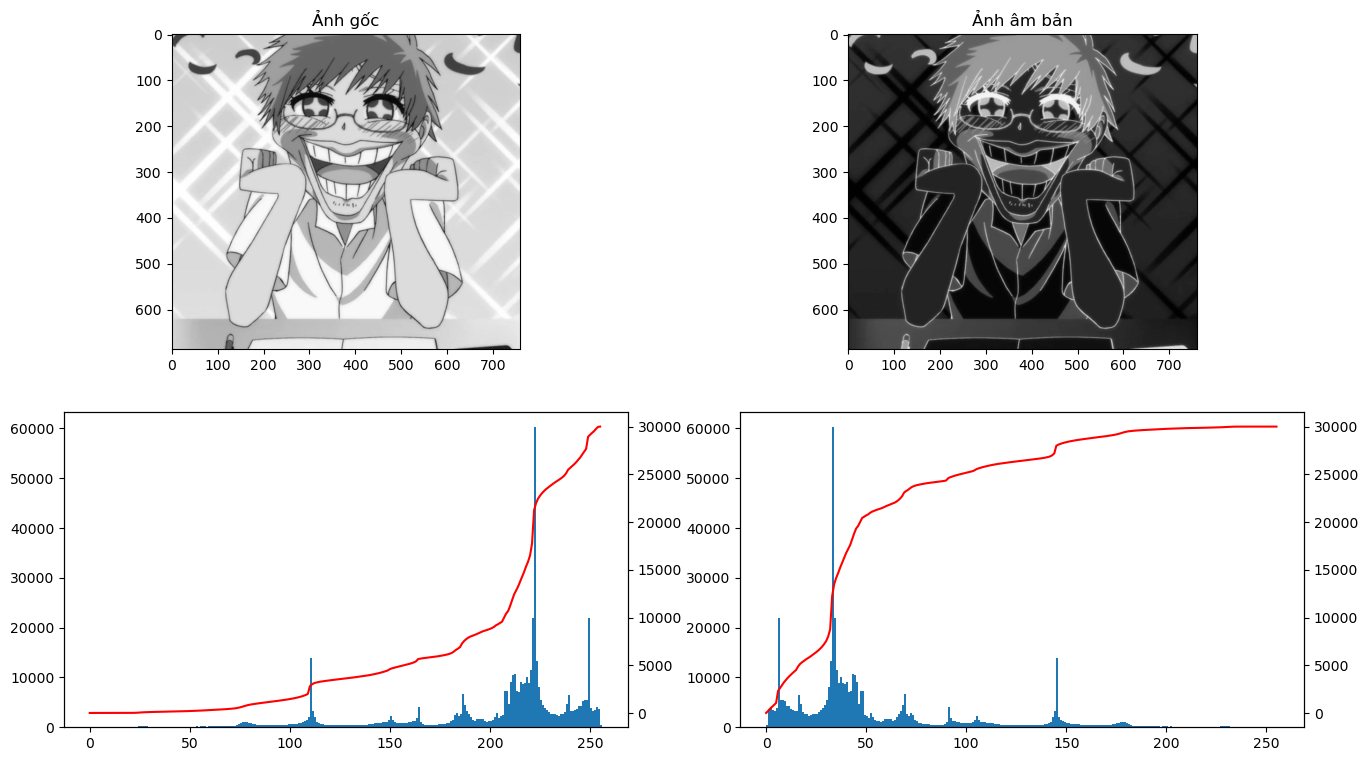

In [2]:
am_ban=255-img
histo, bin_edge = np.histogram(img, bins=np.arange(257))
xs = histo / sum(histo)
histo2, bin_edge2 = np.histogram(am_ban, bins=np.arange(257))
xs2 = histo2 / sum(histo2)
fig=plt.figure(figsize=(16,9))
(anh1,anh2),(hist1,hist2)=fig.subplots(2,2)
anh1.imshow(img,cmap='gray')
anh1.set_title('Ảnh gốc')
anh2.imshow(am_ban,cmap='gray')
anh2.set_title('Ảnh âm bản')
hist1.hist(img.ravel(),256,[0,256])
histt=hist1.twinx()
histt.plot(np.arange(256),xs.cumsum()*3.0e+04,color='red')
hist2.hist(am_ban.ravel(),256,[0,256])
histt=hist2.twinx()
histt.plot(np.arange(256),xs2.cumsum()*3e+4,color='red')


plt.show()


LẤY NGƯỠNG CỨNG

In [3]:
threshold=int(255/2)
anh_cat=np.copy(img)
anh_cat[anh_cat<=threshold]=0
anh_cat[anh_cat>threshold]=255

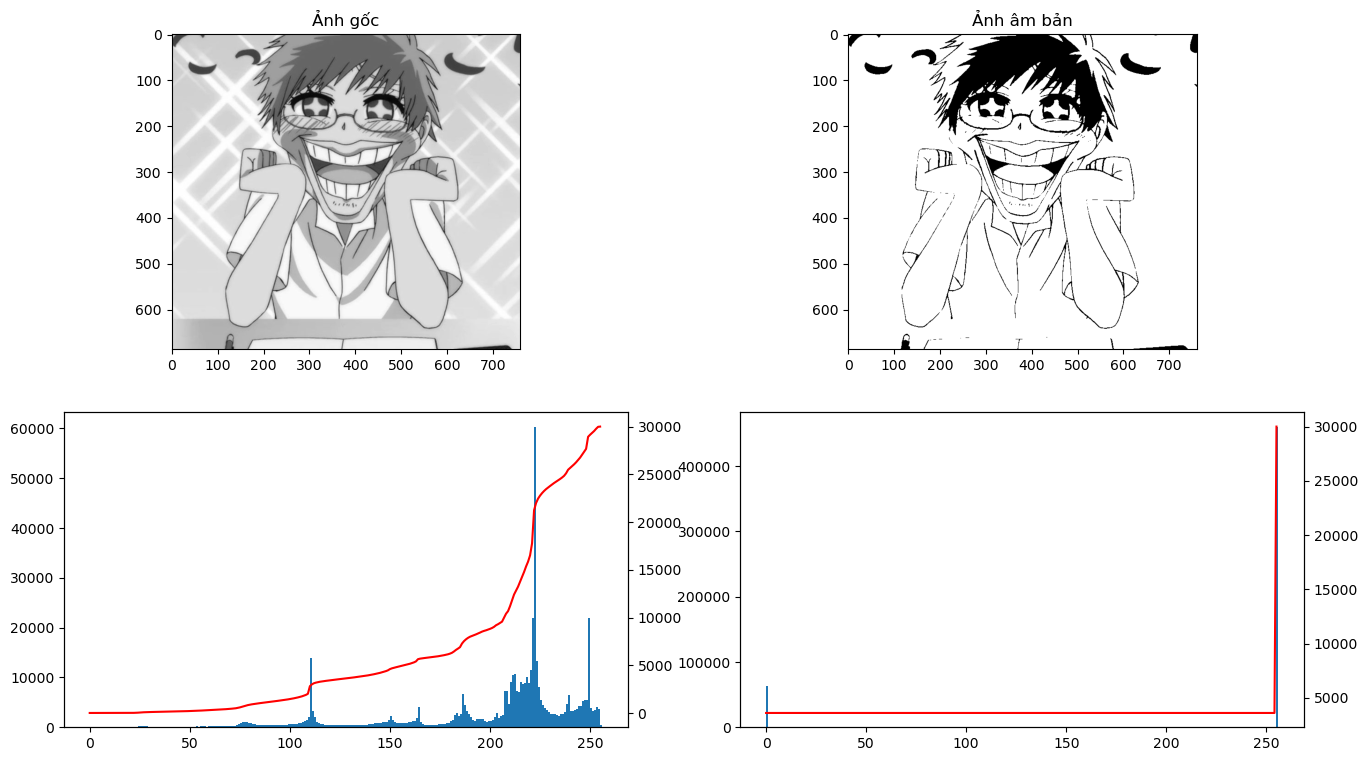

In [4]:
histo, bin_edge = np.histogram(img, bins=np.arange(257))
xs = histo / sum(histo)
histo2, bin_edge2 = np.histogram(anh_cat, bins=np.arange(257))
xs2 = histo2 / sum(histo2)
fig1=plt.figure(figsize=(16,9))
(anh1,anh2),(hist1,hist2)= fig1.subplots(2,2)
anh1.imshow(img,cmap='gray')
anh1.set_title('Ảnh gốc')
anh2.imshow(anh_cat,cmap='gray')
anh2.set_title('Ảnh lấy ngưỡng cứng')
hist1.hist(img.ravel(),256,[0,256])
histt=hist1.twinx()
histt.plot(np.arange(256),xs.cumsum()*3.0e+04,color='red')
hist2.hist(anh_cat.ravel(),256,[0,256])
histt=hist2.twinx()
histt.plot(np.arange(256),xs2.cumsum()*3e+4,color='red')

Lấy NGƯỠNG TOÀN CỤC

In [5]:
def behonT(img, T):
    lst = []
    for i in img:
        if i < T:
            lst.append(i)
    return lst


def lonhonT(img, T):
    lst = []
    for i in img:
        if i > T:
            lst.append(i)
    return lst


In [6]:
anh_cat1=np.copy(img)
anh_cat1=anh_cat1.reshape(-1,1)
threshold1=int(255/2)
deltaT=0
while True:
    x1 = np.array([behonT(anh_cat1, threshold1)])
    x2 = np.array([lonhonT(anh_cat1, threshold1)])
    deltaT=round((x1.mean()+x2.mean())/2)
    if deltaT==threshold1:
        break
    threshold1=deltaT


In [7]:
threshold1

169

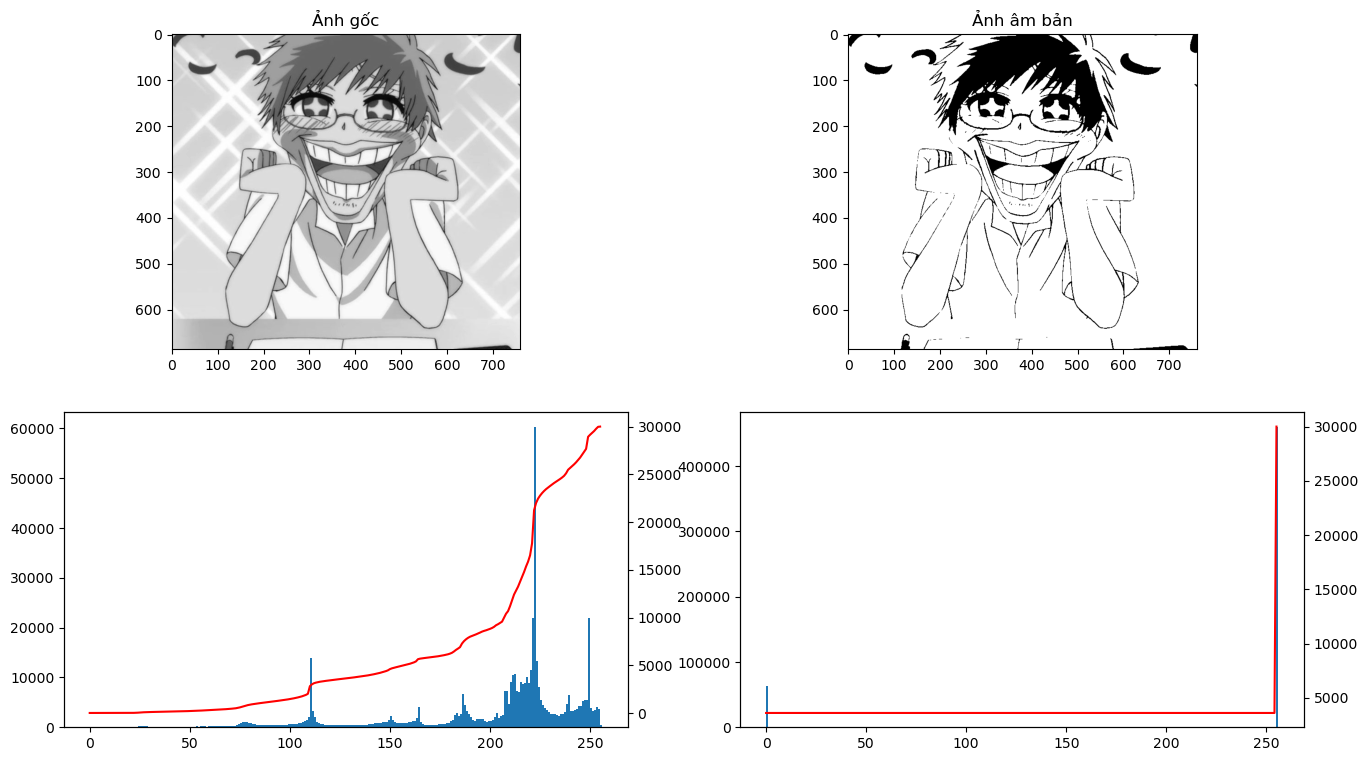

In [8]:
anh_cat1=np.copy(img)
anh_cat1[anh_cat<=threshold1]=0
anh_cat1[anh_cat>threshold1]=255
histo, bin_edge = np.histogram(img, bins=np.arange(257))
xs = histo / sum(histo)
histo2, bin_edge2 = np.histogram(anh_cat1, bins=np.arange(257))
xs2 = histo2 / sum(histo2)
fig2=plt.figure(figsize=(16,9))
(anh1,anh2),(hist1,hist2)= fig2.subplots(2,2)
anh1.imshow(img,cmap='gray')
anh1.set_title('Ảnh gốc')
anh2.imshow(anh_cat1,cmap='gray')
anh2.set_title('Ảnh cắt ngưỡng toàn cục')
hist1.hist(img.ravel(),256,[0,256])
histt=hist1.twinx()
histt.plot(np.arange(256),xs.cumsum()*3.0e+04,color='red')
hist2.hist(anh_cat1.ravel(),256,[0,256])
histt=hist2.twinx()
histt.plot(np.arange(256),xs2.cumsum()*3e+4,color='red')

LẤY NGƯỠNG TỐI ƯU OTSU

In [9]:
anh_cat2=np.copy(img)
histo2, bin_edge = np.histogram(img, bins=np.arange(256),density=True)
lk=histo2.cumsum()
ut=np.multiply(np.arange(255),histo2)
UT=sum(ut)
ut=ut.cumsum()

In [10]:
lk.shape

(255,)

In [11]:
a=np.subtract(lk*UT,ut)
a=a**2
b=lk*(1-lk)
c=a/b

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10824\2176366249.py:4: RuntimeWarning: invalid value encountered in true_divide
  c=a/b


In [12]:
c=np.nan_to_num(c,nan=0)
t=np.unravel_index(np.argmax(c,axis=0),c.shape[0])

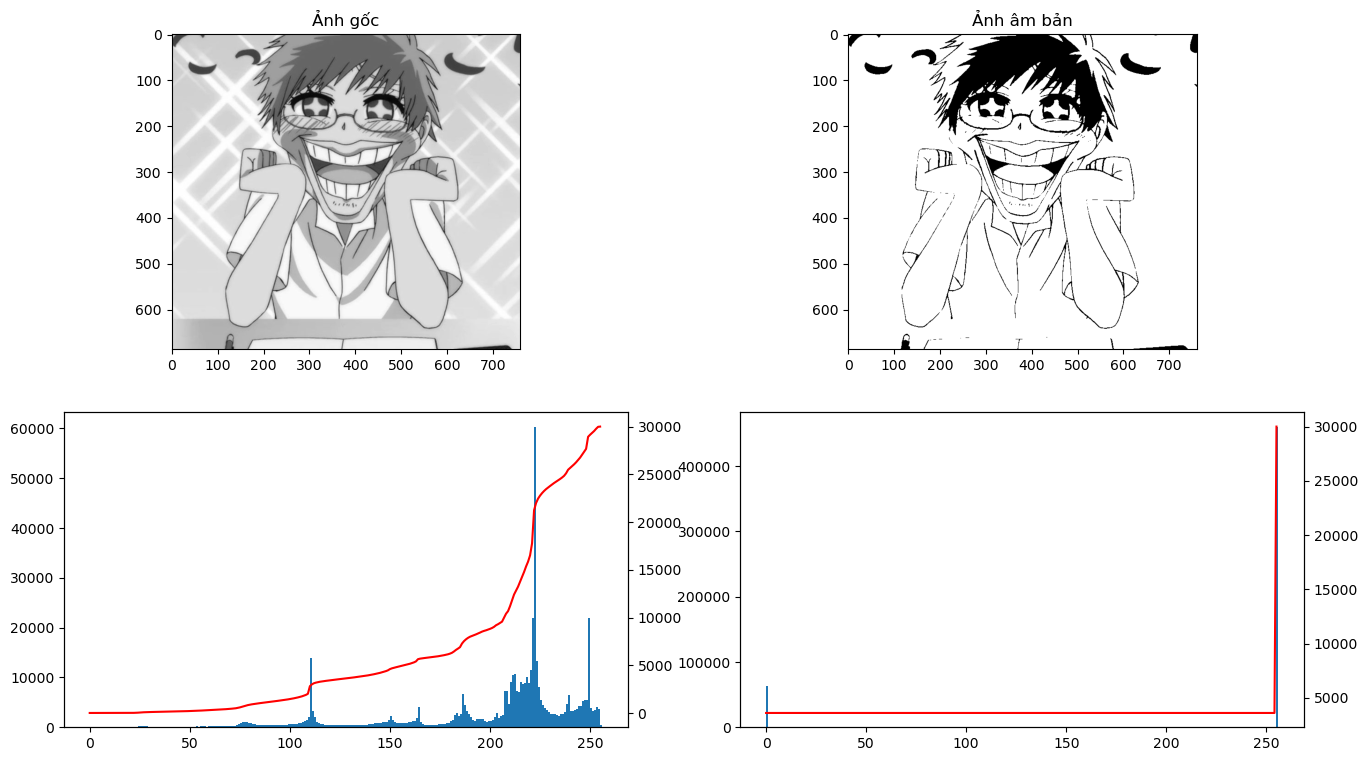

In [13]:
anh_cat2[anh_cat<=t]=0
anh_cat2[anh_cat>t]=255
histo, bin_edge = np.histogram(img, bins=np.arange(257))
xs = histo / sum(histo)
histo2, bin_edge2 = np.histogram(anh_cat2, bins=np.arange(257))
xs2 = histo2 / sum(histo2)
fig3=plt.figure(figsize=(16,9))
(anh1,anh2),(hist1,hist2)= fig3.subplots(2,2)
anh1.imshow(img,cmap='gray')
anh1.set_title('Ảnh gốc')
anh2.imshow(anh_cat2,cmap='gray')
anh2.set_title('Ảnh cắt ngưỡng OTSU')
hist1.hist(img.ravel(),256,[0,256])
histt=hist1.twinx()
histt.plot(np.arange(256),xs.cumsum()*3.0e+04,color='red')
hist2.hist(anh_cat2.ravel(),256,[0,256])
histt=hist2.twinx()
histt.plot(np.arange(256),xs2.cumsum()*3e+4,color='red')
plt.show()